In [229]:
"Модель ВРМБ"

'Модель ВРМБ'

In [372]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from numpy import pi
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.integrate import simpson

from scipy.optimize import root_scalar

In [359]:
Pp0 = 30 #Wt с каждой стороны
Ps = 0.2 #Wt

L = 20 #m
d = 10e-6
D = 125e-6
Aeffs = pi * d**2 / 4
Aeffp = pi * d**2 / 4

N = 4000 * 6.62e22
tau = 1.54e-3
h = 6.63e-34
n = 1.44
c = 3e8 / 1.44

lmbda_p = 1650 # in nm
va = 5.96e3 #m/s
gb0 = 5e-11 # lmbda = 1550 nm
a = 1


In [405]:

def Yb_VRMB(z, P_init, a, lmbda_p):

    v_b = 2 * n * va / lmbda_p
    v_s = c/lmbda_p
    lmbda_s = c/(v_s - v_b )
    print('lmbda_s= ', lmbda_s)
    
    gb = gb0 * (1550/ lmbda_p)**2
    print('gb = ', gb)

    def fun(z, I): #right hand statement of a system
        Ip = I[0]
        Is = I[1]
        dIp = -gb * Ip * Is - a * Ip
        dIs = -gb * Ip * Is + a * Is
        # print('I:', Ip, Is, 'dI:', dIp, dIs)
        return [dIp, dIs]
        
    Ip0 =  P_init[0] / Aeffp
    IsL =  P_init[1] / Aeffs
      
    I0 = [Ip0, IsL]

    def bc(ya, yb):
        return np.array([ya[0] - Ip0, yb[1] - IsL])
    

    def Is0_f(Is0):
        return IsL - Is0 * (Ip0 - Is0)/ (Ip0 * np.exp(gb * z[-1] * (Ip0 - Is0)) - Is0)
    
    Is0 = root_scalar(Is0_f, bracket=[0, Ip0]).root
    print("Ps0 = ", Is0*Aeffs)

    print('coef = ', gb * IsL)
    # I_guess = [Ip0 * np.exp(-gb * Is0 * z), 
    #            Is0 * np.exp(-gb * Ip0 * z) ]
    I_guess = [Ip0 * np.exp(-gb * IsL * z), 
               IsL * np.exp( gb * IsL * (z[-1]- z)) ]

    Z_guess = z    
 
    plt.plot(Z_guess, I_guess[0] * Aeffp, 'o', label = 'Ip_guess')
    plt.plot(Z_guess, I_guess[1] * Aeffp, 'o', label = "Is_guess")
    plt.legend()
    
    Leff = 1/a * (1 - np.exp(-a * z[-1]))
    Ppcr = 21 * Aeffp /(Leff  * gb)
    print("Ppcr = ", Ppcr)


    answer = solve_bvp(fun,bc,Z_guess,  I_guess )
    return lmbda_s, answer.sol(z)
 
   



lmbda_s=  1650.1359564175907
gb =  4.412304866850322e-11
Ps0 =  19.826389047421824
coef =  5.617921039901247e-06
Ppcr =  0.5913488389797631
1650 1650.1359564175907
0.88723687480181


C:\Users\vika\AppData\Local\Temp\ipykernel_41440\2910342482.py:29: RuntimeWarning: overflow encountered in exp
  return IsL - Is0 * (Ip0 - Is0)/ (Ip0 * np.exp(gb * z[-1] * (Ip0 - Is0)) - Is0)
C:\Users\vika\AppData\Local\Temp\ipykernel_41440\2910342482.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return IsL - Is0 * (Ip0 - Is0)/ (Ip0 * np.exp(gb * z[-1] * (Ip0 - Is0)) - Is0)


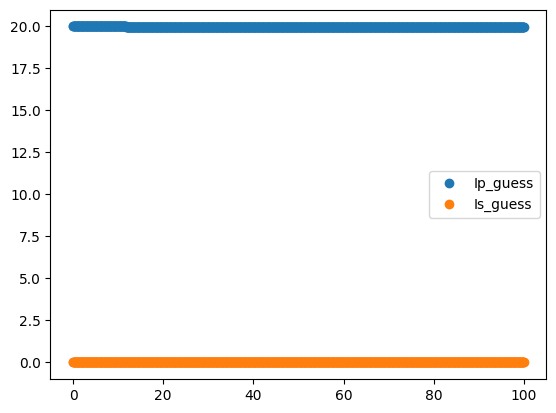

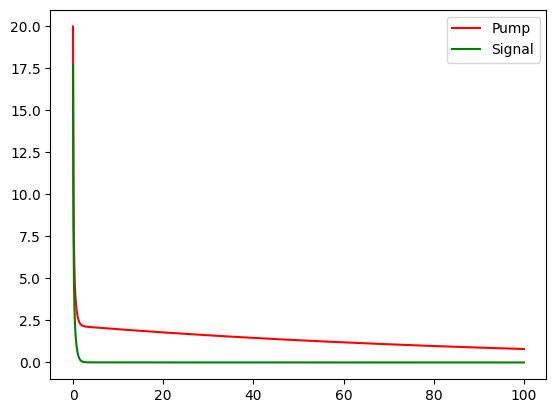

In [409]:
L = 100
z = np.linspace(0, L, 1000)
# print(L)
P_init = [20, 0.00001]
a = 0.01
lmbda_s1, sol = Yb_VRMB(z, P_init, a, lmbda_p)

print(lmbda_p, lmbda_s1)
fig, ax = plt.subplots()

ax.plot(z, sol[0] * ( Aeffp ),   'r-', label = 'Pump')
ax.plot(z, sol[1] * ( Aeffs ),  'g-', label = 'Signal' )
ax.legend(loc = 2)
ax.legend(loc = 1)
print(sol[1][0]/sol[0][0])

In [429]:

def Yb_VRMB2(z, P_init, a, lmbda_p):

    #первый порядок
    v_b1 = 2 * n * va / lmbda_p
    v_s1 = c/lmbda_p
    lmbda_s1 = c/(v_s1 - v_b1 )

    #второй порядок 
    v_b2 = 2 * n * va/ lmbda_s1
    v_s2 = c/lmbda_s1
    lmbda_s2 = c/(v_s2 - v_b2)

    print('lmbda_s= ', lmbda_s1)
    print('lmbda_s2= ', lmbda_s2)
    
    gb = gb0 * (1550/ lmbda_p)**2
    # второй gb такой же потому что длины волн похожиие
    print('gb = ', gb)

    def fun(z, I): #right hand statement of a system
        Ip = I[0]
        Is1 = I[1]
        Is2 = I[2]

        dIp = - gb * Ip * Is1
        dIs1 = - gb * Ip * Is1 + gb * Is2 * Is1
        dIs2 = + gb * Is2 * Is1 
        # print('I:', Ip, Is, 'dI:', dIp, dIs)
        return [dIp, dIs1, dIs2]
        
    Ip0 =  P_init[0] / Aeffp
    Is1L =  P_init[1] / Aeffs
    Is20 =  P_init[2] / Aeffs
      
    I0 = [Ip0, Is1L, Is20]

    def bc(ya, yb):
        return np.array([ya[0] - Ip0, yb[1] - Is1L, ya[2] - Is20])
    

    
  
    # I_guess = [Ip0 * np.exp(-gb * IsL * z), 
    #            Is0 * np.exp(-gb * IsL * z) ]
    I_guess = [Ip0 * np.exp(- 0.1 * z), 
               Is1L * np.exp(0.1 * (z[-1]- z)) , 
               Is20 * np.exp(+ 0.1* z)]

    Z_guess = z    
 
    plt.plot(Z_guess, I_guess[0] * Aeffp, 'o', label = 'Ip_guess')
    plt.plot(Z_guess, I_guess[1] * Aeffp, 'o', label = "Is_guess")
    plt.plot(Z_guess, I_guess[2] * Aeffp, 'o', label = "Is_guess")
    plt.legend()
    
    Leff = 1/a * (1 - np.exp(-a * z[-1]))
    Ppcr = 16 * Aeffp /(Leff  * gb)
    print("Ppcr = ", Ppcr)


    answer = solve_bvp(fun,bc,Z_guess,  I_guess )
    return lmbda_s1, lmbda_s2,  answer.sol(z)
 

lmbda_s=  1650.1359564175907
lmbda_s2=  1650.2719240376948
gb =  4.412304866850322e-11
Ppcr =  2.9928030301998723
1650 1650.1359564175907 1650.2719240376948
1.204128531765525


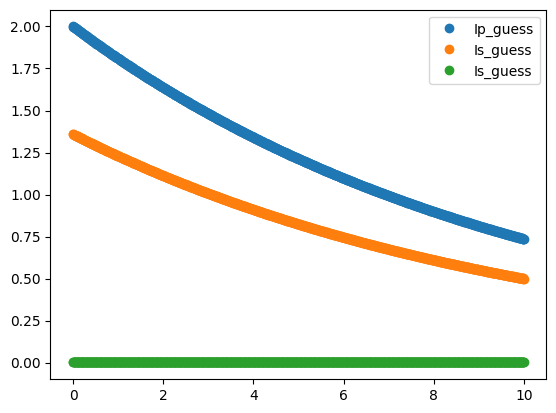

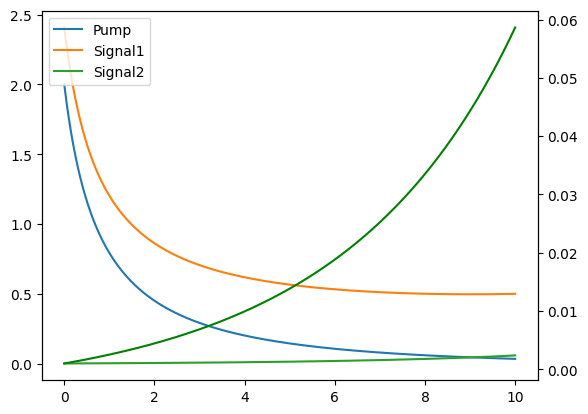

In [435]:
L = 10
z = np.linspace(0, L, 1000)
# print(L)
P_init = [2, 0.5, 0.001]
a = 0.01
lmbda_s1, lmbda_s2, sol = Yb_VRMB2(z, P_init, a, lmbda_p)

print(lmbda_p, lmbda_s1, lmbda_s2)
fig, ax = plt.subplots()
ax1 = ax.twinx()

ax.plot(z, sol[0] * ( Aeffp ),  '-', label = 'Pump')
ax.plot(z, sol[1] * ( Aeffs ),  '-', label = 'Signal1' )
ax.plot(z, sol[2] * ( Aeffs ),  '-', label = 'Signal2' )
ax1.plot(z, sol[2] * ( Aeffs ),  'g-', label = 'Signal2' )
ax.legend(loc = 2)

print(sol[1][0]/sol[0][0])

In [ ]:
# учесть спектр